<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Linear_Regression_Implemantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> **Implementing Multiple Linear Regression** </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [33]:
df=pd.read_csv('/content/Copy of 50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
df.shape

(50, 5)

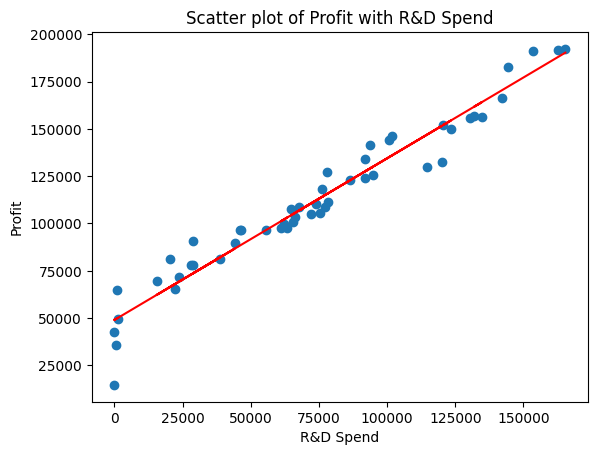

In [35]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

# Calculate the regression line
m, b = np.polyfit(df['R&D Spend'], df['Profit'], 1)
plt.plot(df['R&D Spend'], m * df['R&D Spend'] + b, color='red')
plt.show()

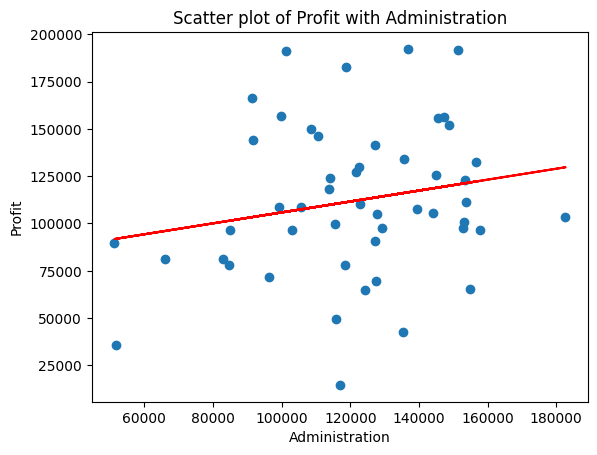

In [36]:
plt.scatter(df['Administration'],df['Profit'])
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')

# Calculate the regression line
m, b = np.polyfit(df['Administration'], df['Profit'], 1)
plt.plot(df['Administration'], m * df['Administration'] + b, color='red')
plt.show()

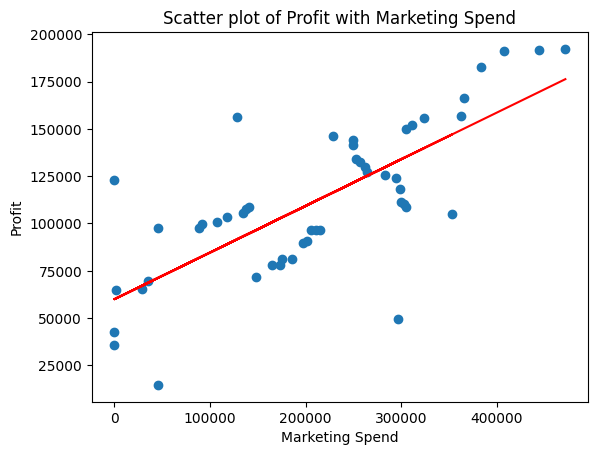

In [37]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

# Calculate the regression line
m, b = np.polyfit(df['Marketing Spend'], df['Profit'], 1)
plt.plot(df['Marketing Spend'], m * df['Marketing Spend'] + b, color='red')
plt.show()

<Axes: xlabel='State'>

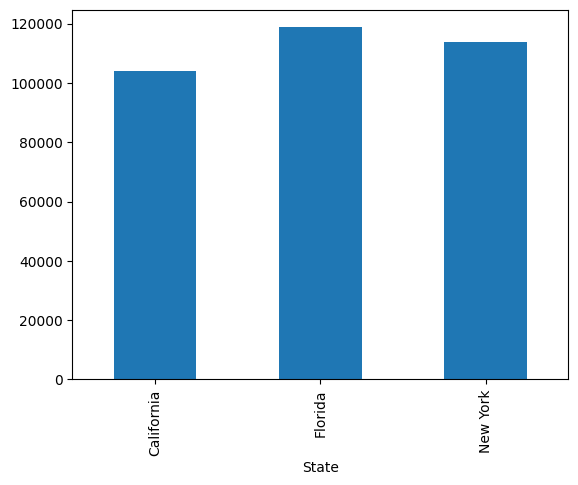

In [38]:
df.groupby('State')['Profit'].mean().plot(kind='bar')


In [39]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [40]:
df['State_new_york'] = np.where(df['State']=='New York',1,0)
df['State_california'] = np.where(df['State']=='California',1,0)
df['State_florida'] = np.where(df['State']=='Florida',1,0)

df.drop(columns=['State'],axis = 1,inplace = True)

In [41]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_new_york,State_california,State_florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
dependent_variable=df['Profit']
independent_variable=df.drop(columns=['Profit'],axis=1)

In [44]:
dependent_variable

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [45]:
independent_variable

,R&D Spend,Administration,Marketing Spend,State_new_york,State_california,State_florida
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1
5,131876.90,99814.71,362861.36,1,0,0
6,134615.46,147198.87,127716.82,0,1,0
7,130298.13,145530.06,323876.68,0,0,1
8,120542.52,148718.95,311613.29,1,0,0
9,123334.88,108679.17,304981.62,0,1,0


In [46]:
X=independent_variable.values
y=dependent_variable.values

In [47]:
print(X)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.0067196e+05 9.179

In [48]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [49]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
print('features in training dataset:-',X_train.shape)
print('target in training dataset:-',y_train.shape)
print('features in testing dataset:-',X_test.shape)
print('target in testing dataset:-',y_test.shape)

features in training dataset:- (40, 6)
target in training dataset:- (40,)
features in testing dataset:- (10, 6)
target in testing dataset:- (10,)


In [51]:
scalar=MinMaxScaler()
X_train_scalar=scalar.fit_transform(X_train)
X_test_scalar=scalar.transform(X_test)

In [52]:
X_train

array([[5.5493950e+04, 1.0305749e+05, 2.1463481e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.6014020e+04, 8.5047440e+04, 2.0551764e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5328870e+04, 1.4413598e+05, 1.3405007e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.6426070e+04, 1.5769392e+05, 2.1079767e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.1749160e+04, 1.1417579e+05, 2.9491957e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.1994324e+05, 1.5654742e+05, 2.5651292e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0002300e+03, 1.2415304e+05, 1.9039300e+03, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05,

In [53]:
X_test

array([[6.6051520e+04, 1.8264556e+05, 1.1814820e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.7892920e+04, 8.4710770e+04, 1.6447071e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [7.2107600e+04, 1.2786455e+05, 3.5318381e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0229590e+04, 6.5947930e+04, 1.8526510e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.1136380e+04, 1.5270192e+05, 8.8218230e+04, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3994560e+04, 1.2278275e+05, 3.0331926e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04,

In [54]:
Regression=LinearRegression()
Regression.fit(X_train_scalar,y_train)

LinearRegression()

In [55]:
Regression.coef_

array([ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,  7.86007422e+02,
        8.66383692e+01, -8.72645791e+02])

In [56]:
pred_train=Regression.predict(X_train_scalar)
pred_test=Regression.predict(X_test_scalar)

In [57]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [59]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [58]:
test_pred=Regression.predict(X_test_scalar)

In [60]:
mean_squared_error(pred_train,y_train)

81571001.80077371

In [61]:
mean_squared_error(pred_test,y_test)

83502864.03257735

In [62]:
root_mean_squared_error=np.sqrt(mean_squared_error(pred_train,y_train))
root_mean_squared_error

9031.66661257897

In [63]:
root_mean_squared_error=np.sqrt(mean_squared_error(pred_test,y_test))
root_mean_squared_error

9137.990152794944

In [64]:
r2_score(pred_train,y_train)

0.9475731045123279

In [65]:
r2_score(pred_test,y_test)

0.9293749209318112

In [68]:
mean_absolute_percentage_error(pred_train,y_train)*100

7.85311735896922

In [69]:
mean_absolute_percentage_error(pred_test,y_test)*100

6.933636840126598

In [70]:
Regression.predict([[165349.20,136897.80,471784.10,0,0,1]])

array([2.97746246e+10])

In [71]:
from sklearn.linear_model import Ridge, Lasso

In [72]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scalar, y_train)
ridge_pred_train = ridge_reg.predict(X_train_scalar)
ridge_pred_test = ridge_reg.predict(X_test_scalar)

In [75]:
print("Ridge Regression - Train R2 Score:", r2_score(y_train, ridge_pred_train))
print("Ridge Regression - Test R2 Score:", r2_score(y_test, ridge_pred_test))
print("Ridge Regression - Train MSE:", mean_squared_error(y_train, ridge_pred_train))
print("Ridge Regression - Test MSE:", mean_squared_error(y_test, ridge_pred_test))
print("Ridge Regression - Train RMSE:", np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print("Ridge Regression - Test RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred_test)))
print("Ridge Regression - Train MAPE:", mean_absolute_percentage_error(y_train, ridge_pred_train))
print("Ridge Regression - Test MAPE:", mean_absolute_percentage_error(y_test, ridge_pred_test))


Ridge Regression - Train R2 Score: 0.9070974955252403
Ridge Regression - Test R2 Score: 0.802018305863623
Ridge Regression - Train MSE: 152125148.40948087
Ridge Regression - Test MSE: 253197124.1995201
Ridge Regression - Train RMSE: 12333.902399868457
Ridge Regression - Test RMSE: 15912.169060172786
Ridge Regression - Train MAPE: 0.16181148382833288
Ridge Regression - Test MAPE: 0.09081095583804902


In [76]:
# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scalar, y_train)
lasso_pred_train = lasso_reg.predict(X_train_scalar)
lasso_pred_test = lasso_reg.predict(X_test_scalar)

In [78]:
print("\nLasso Regression - Train R2 Score:", r2_score(y_train, lasso_pred_train))
print("Lasso Regression - Test R2 Score:", r2_score(y_test, lasso_pred_test))
print("Lasso Regression - Train MSE:", mean_squared_error(y_train, lasso_pred_train))
print("Lasso Regression - Test MSE:", mean_squared_error(y_test, lasso_pred_test))
print("Lasso Regression - Train RMSE:", np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print("Lasso Regression - Test RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred_test)))
print("Lasso Regression - Train MAPE:", mean_absolute_percentage_error(y_train, lasso_pred_train))
print("Lasso Regression - Test MAPE:", mean_absolute_percentage_error(y_test, lasso_pred_test))


Lasso Regression - Train R2 Score: 0.9501847300157252
Lasso Regression - Test R2 Score: 0.9347992540829794
Lasso Regression - Train MSE: 81571055.40114948
Lasso Regression - Test MSE: 83384685.81080765
Lasso Regression - Train RMSE: 9031.669579936452
Lasso Regression - Test RMSE: 9131.521549599916
Lasso Regression - Train MAPE: 0.11644046207098999
Lasso Regression - Test MAPE: 0.06445404182387379
